   temp   atemp  humidity  windspeed
0  9.84  14.395        81        0.0
1  9.02  13.635        80        0.0
2  9.02  13.635        80        0.0
3  9.84  14.395        75        0.0
4  9.84  14.395        75        0.0
       temp     atemp  humidity  windspeed
0 -1.333661 -1.092737  0.993213  -1.567754
1 -1.438907 -1.182421  0.941249  -1.567754
2 -1.438907 -1.182421  0.941249  -1.567754
3 -1.333661 -1.092737  0.681430  -1.567754
4 -1.333661 -1.092737  0.681430  -1.567754
predicted class_prob (1st data) [0.95 0.05]
target data index(1st data) 0
sample threshold index(n=10): [   0  110  220  330  440  550  660  770  880  990 1100]
sample threshold value(n=10): [1.46 0.19 0.14 0.1  0.08 0.06 0.04 0.04 0.03 0.02 0.01]
sample threshold FPR(n=10): [0.    0.066 0.139 0.223 0.318 0.409 0.519 0.611 0.716 0.821 0.933]
sample threshold TPR(n=10): [0.    0.257 0.443 0.587 0.691 0.774 0.843 0.887 0.935 0.978 1.   ]


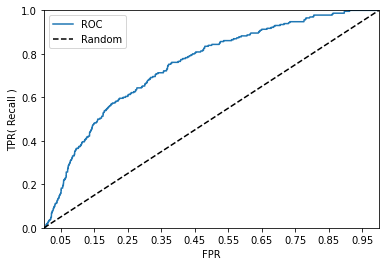

Testing data AUC :0.7473


In [39]:
from time import thread_time_ns

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

url = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-machine-learning-20210326/bike-demand.csv'
df_bike = pd.read_csv(url)

x_df_bike = df_bike.iloc[:,5:9]
print(x_df_bike.head(5))

#종속변수 선언 -> 이진화 작업 필요-> DataFrame 필요 
df_bike['y'] = 1
df_bike.loc[df_bike['count']<500, 'y'] = 0
y = df_bike['y']

# 데이터를 동등한 선상에서 비교하기 위한 표준화 
scaler=StandardScaler()
scaler.fit(x_df_bike)
result=scaler.transform(x_df_bike)

dataframe = pd.DataFrame(data = result, columns = x_df_bike.columns)
print(dataframe.iloc[:5])

x_train,x_test,y_train,y_test = train_test_split(dataframe,y, test_size=0.3, random_state=13)

logit= LogisticRegression()
logit.fit(x_train, y_train)

#roc_curve  메소드 코딩 
from sklearn.metrics import roc_curve

#각각의 클래스 별 확률값 -> 모델의 예측 데이터 
predict_prob = logit.predict_proba(x_test)
print("predicted class_prob (1st data)", np.round(predict_prob[0],3))
# 모델의 정답 데이터 
print("target data index(1st data)",y_test.values[0])


#threshold value 생성 
# positive 한 값만 골라오기 위해 슬라이싱 진행 
fprs , tprs , thresholds = roc_curve(y_test,predict_prob[:,1]) 

thr_index = np.arange(0,thresholds.shape[0],110)
print('sample threshold index(n=10):',thr_index )
print('sample threshold value(n=10):',np.round(thresholds[thr_index],2))
print('sample threshold FPR(n=10):',np.round(fprs[thr_index],3))
print('sample threshold TPR(n=10):',np.round(tprs[thr_index],3))

# ROC 그릭기 위한 함수 
def roc_curve_plot(y_test , pred_proba_c1):
    import matplotlib.pyplot as plt
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test,logit.predict_proba(x_test)[:,1])
# positive 한 값만 가져오기 위해슬라이싱 
 
# AUC
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test.values , predict_prob[:,1])
print("Testing data AUC :{0:.4f}".format(roc_score))
